In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
transaction_dataset= pd.read_csv("/content/creditcard.csv")
transaction_dataset.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
5,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0.0
6,4,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0.0
7,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0.0
8,7,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0.0
9,9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0.0


In [3]:
# last 5 rows

transaction_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
7968,10980,1.284388,-0.013181,0.646174,0.198985,-0.568675,-0.526121,-0.448235,-0.167709,1.773223,...,-0.101868,-0.030298,-0.081412,-0.123281,0.278808,1.064001,-0.090181,0.000481,15.95,0.0
7969,10981,1.190428,-0.122329,0.954945,0.267101,-0.971026,-0.652279,-0.612992,-0.003909,1.633117,...,-0.015001,0.127027,0.012079,0.534409,0.112179,1.004483,-0.100188,-0.004774,14.95,0.0
7970,10981,-0.725175,0.298202,1.824761,-2.587170,0.283605,-0.016617,0.153659,0.045084,-0.197611,...,-0.017097,-0.070535,-0.442861,-0.895837,0.624743,-0.510601,-0.031142,0.025564,12.95,0.0
7971,10981,1.226153,-0.129645,0.735197,0.142752,-0.703245,-0.349641,-0.612641,0.020507,1.648986,...,-0.047936,0.040196,-0.057391,-0.012386,0.187685,1.037786,-0.100081,-0.009869,15.95,0.0
7972,10981,1.145381,-0.059349,0.968088,0.267891,-0.822582,-0.597727,-0.450197,-0.119747,1.338188,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# check shape of dataset

transaction_dataset.shape

# dataset has 73377 rows and 31 columns

(7973, 31)

In [5]:
# dataset information

transaction_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7973 entries, 0 to 7972
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    7973 non-null   int64  
 1   V1      7973 non-null   float64
 2   V2      7973 non-null   float64
 3   V3      7973 non-null   float64
 4   V4      7973 non-null   float64
 5   V5      7973 non-null   float64
 6   V6      7973 non-null   float64
 7   V7      7973 non-null   float64
 8   V8      7973 non-null   float64
 9   V9      7973 non-null   float64
 10  V10     7973 non-null   float64
 11  V11     7973 non-null   float64
 12  V12     7973 non-null   float64
 13  V13     7973 non-null   float64
 14  V14     7973 non-null   float64
 15  V15     7972 non-null   float64
 16  V16     7972 non-null   float64
 17  V17     7972 non-null   float64
 18  V18     7972 non-null   float64
 19  V19     7972 non-null   float64
 20  V20     7972 non-null   float64
 21  V21     7972 non-null   float64
 22  

In [6]:
# dataset datatype

transaction_dataset.dtypes

Time        int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class     float64
dtype: object

In [7]:
# mathematical values of dataset

transaction_dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,...,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000
mean,4257.151261,-0.299740,0.295226,0.899355,0.215736,-0.025285,0.157286,-0.026445,-0.070525,0.655244,...,-0.053715,-0.165799,-0.035174,0.025977,0.088893,0.020256,0.016150,0.001161,65.413540,0.003136
std,3198.964299,1.498341,1.283914,1.090297,1.447057,1.167218,1.325015,1.063709,1.332568,1.156618,...,0.953498,0.654858,0.488322,0.601760,0.427505,0.517409,0.403570,0.275976,194.911169,0.055915
min,0.000000,-23.066842,-25.640527,-12.389545,-4.657545,-32.092129,-7.574798,-12.968670,-23.632502,-3.878658,...,-11.468435,-8.527145,-15.144340,-2.512377,-2.577363,-1.338556,-7.976100,-3.054085,0.000000,0.000000
25%,1531.000000,-1.046362,-0.237359,0.372435,-0.687521,-0.630525,-0.655399,-0.517733,-0.199794,-0.085635,...,-0.271837,-0.581473,-0.182989,-0.340419,-0.161009,-0.363180,-0.063198,-0.019081,4.617500,0.000000
50%,3635.000000,-0.416341,0.335446,0.948695,0.223379,-0.107337,-0.148669,0.004732,0.016128,0.613170,...,-0.130344,-0.167048,-0.046107,0.089606,0.115418,-0.015260,0.007101,0.018443,15.950000,0.000000
75%,6662.000000,1.122758,0.950582,1.597949,1.131542,0.405082,0.555200,0.527353,0.307111,1.294087,...,0.044823,0.250886,0.086806,0.421015,0.361249,0.329322,0.144700,0.080563,54.910000,0.000000
max,10981.000000,1.685314,8.261750,4.101716,7.380245,11.974269,21.393069,34.303177,3.877662,10.392889,...,22.588989,4.534454,13.876221,3.200201,5.525093,3.517346,4.173387,4.860769,7712.430000,1.000000


In [8]:
# finding null values in dataset

transaction_dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [9]:
# total null values in all rows and columns

transaction_dataset.isnull().sum().sum()

# hence there are total 28 null values

16

In [10]:

# distribution of legit transaction and fraudulent transaction

transaction_dataset['Class'].value_counts()

# data is highly unbalanced

Class
0.0    7947
1.0      25
Name: count, dtype: int64

Seperating data for analysis
0 : Normal transaction
1 : Fraudulent transaction

In [11]:
legit = transaction_dataset[transaction_dataset.Class == 0]
fraud = transaction_dataset[transaction_dataset.Class == 1]

In [12]:
print("Shape of legit : ", legit.shape)
print("Shape of fraud : ", fraud.shape)

Shape of legit :  (7947, 31)
Shape of fraud :  (25, 31)


In [13]:
# measures

legit.Amount.describe()

count    7947.000000
mean       65.284891
std       194.126547
min         0.000000
25%         4.795000
50%        15.950000
75%        54.990000
max      7712.430000
Name: Amount, dtype: float64

In [14]:
fraud.Amount.describe()
# fraud transaction description

count      25.000000
mean      106.308400
std       372.676883
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max      1809.680000
Name: Amount, dtype: float64

In [15]:
# comparing the values for both transaction

transaction_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,4246.546496,-0.297235,0.286979,0.917142,0.201968,-0.023263,0.164019,-0.019547,-0.072779,0.662196,...,0.042418,-0.055123,-0.165485,-0.034918,0.026636,0.088960,0.019511,0.014875,0.000417,65.284891
1.0,7359.240000,-1.154048,2.930880,-4.757618,4.590240,-0.636103,-1.952536,-2.202403,0.647916,-1.581984,...,0.263011,0.393614,-0.265715,-0.116502,-0.183413,0.067479,0.256994,0.421586,0.237600,106.308400


Under-Sampling
build a sample dataset having similar distribution of normal and fraudulent transactions.
number of fraudulent transaction is = 492

In [17]:
ligit_sample = transaction_dataset.sample(n = 492)

Concatinating two samplings

In [18]:
new_transaction_dataset2 = pd.concat([ligit_sample, fraud], axis = 0)



In [19]:

new_transaction_dataset2.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1514,1179,0.657389,-0.643789,0.947302,1.257065,-1.068192,-0.234603,-0.134554,0.024979,0.045412,...,0.250563,0.190877,-0.189465,0.545284,0.208661,-0.497745,0.011424,0.074978,251.35,0.0
894,674,1.317181,-0.041192,0.031846,-0.374863,-0.181220,-0.370040,-0.157920,-0.025507,0.080691,...,-0.116005,-0.354254,-0.065098,-0.442750,0.314053,0.995430,-0.089712,-0.015727,0.92,0.0
7251,9597,-1.367604,1.660338,0.913803,0.847301,0.259609,1.668865,-0.507756,1.167468,0.281774,...,-0.159817,-0.149244,0.148072,-1.113154,-0.704838,0.365926,-0.294723,-0.198586,8.96,0.0
6427,7610,0.725646,2.300894,-5.329976,4.007683,-1.730411,-1.732193,-3.968593,1.063728,-0.486097,...,0.589669,0.109541,0.601045,-0.364700,-1.843078,0.351909,0.594550,0.099372,1.00,1.0
6752,8486,-1.667389,-0.121980,1.942609,-0.149046,1.787022,-0.432432,-0.215075,0.348402,0.496906,...,-0.184991,-0.723443,0.098882,-0.410090,0.065654,0.013938,-0.048421,0.071853,6.50,0.0


In [20]:
new_transaction_dataset2.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
6870,8757,-1.863756,3.442644,-4.468260,2.805336,-2.118412,-2.332285,-4.261237,1.701682,-1.439396,...,0.667927,-0.516242,-0.012218,0.070614,0.058504,0.304883,0.418012,0.208858,1.00,1.0
6882,8808,-4.617217,1.695694,-3.114372,4.328199,-1.873257,-0.989908,-4.577265,0.472216,0.472017,...,0.481830,0.146023,0.117039,-0.217565,-0.138776,-0.424453,-1.002041,0.890780,1.10,1.0
6899,8878,-2.661802,5.856393,-7.653616,6.379742,-0.060712,-3.131550,-3.103570,1.778492,-3.831154,...,0.734775,-0.435901,-0.384766,-0.286016,1.007934,0.413196,0.280284,0.303937,1.00,1.0
6903,8886,-2.535852,5.793644,-7.618463,6.395830,-0.065210,-3.136372,-3.104557,1.823233,-3.878658,...,0.716720,-0.448060,-0.402407,-0.288835,1.011752,0.425965,0.413140,0.308205,1.00,1.0
6971,9064,-3.499108,0.258555,-4.489558,4.853894,-6.974522,3.628382,5.431271,-1.946734,-0.775680,...,-1.052368,0.204817,-2.119007,0.170279,-0.393844,0.296367,1.985913,-0.900452,1809.68,1.0


In [21]:


new_transaction_dataset2['Class'].value_counts()

Class
0.0    490
1.0     27
Name: count, dtype: int64

In [22]:
new_transaction_dataset2.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,4227.981633,-0.342361,0.284757,0.939421,0.183617,0.068248,0.179951,-0.023978,-0.125644,0.684835,...,0.052990,-0.069376,-0.163514,-0.027748,0.046753,0.113997,0.018881,0.025974,-0.004171,58.105061
1.0,7375.629630,-1.029966,2.940073,-4.810577,4.622635,-0.595517,-1.970257,-2.213898,0.641378,-1.582013,...,0.276601,0.394032,-0.260929,-0.107234,-0.191477,0.048839,0.269183,0.431595,0.238589,98.507778


Data Visualization

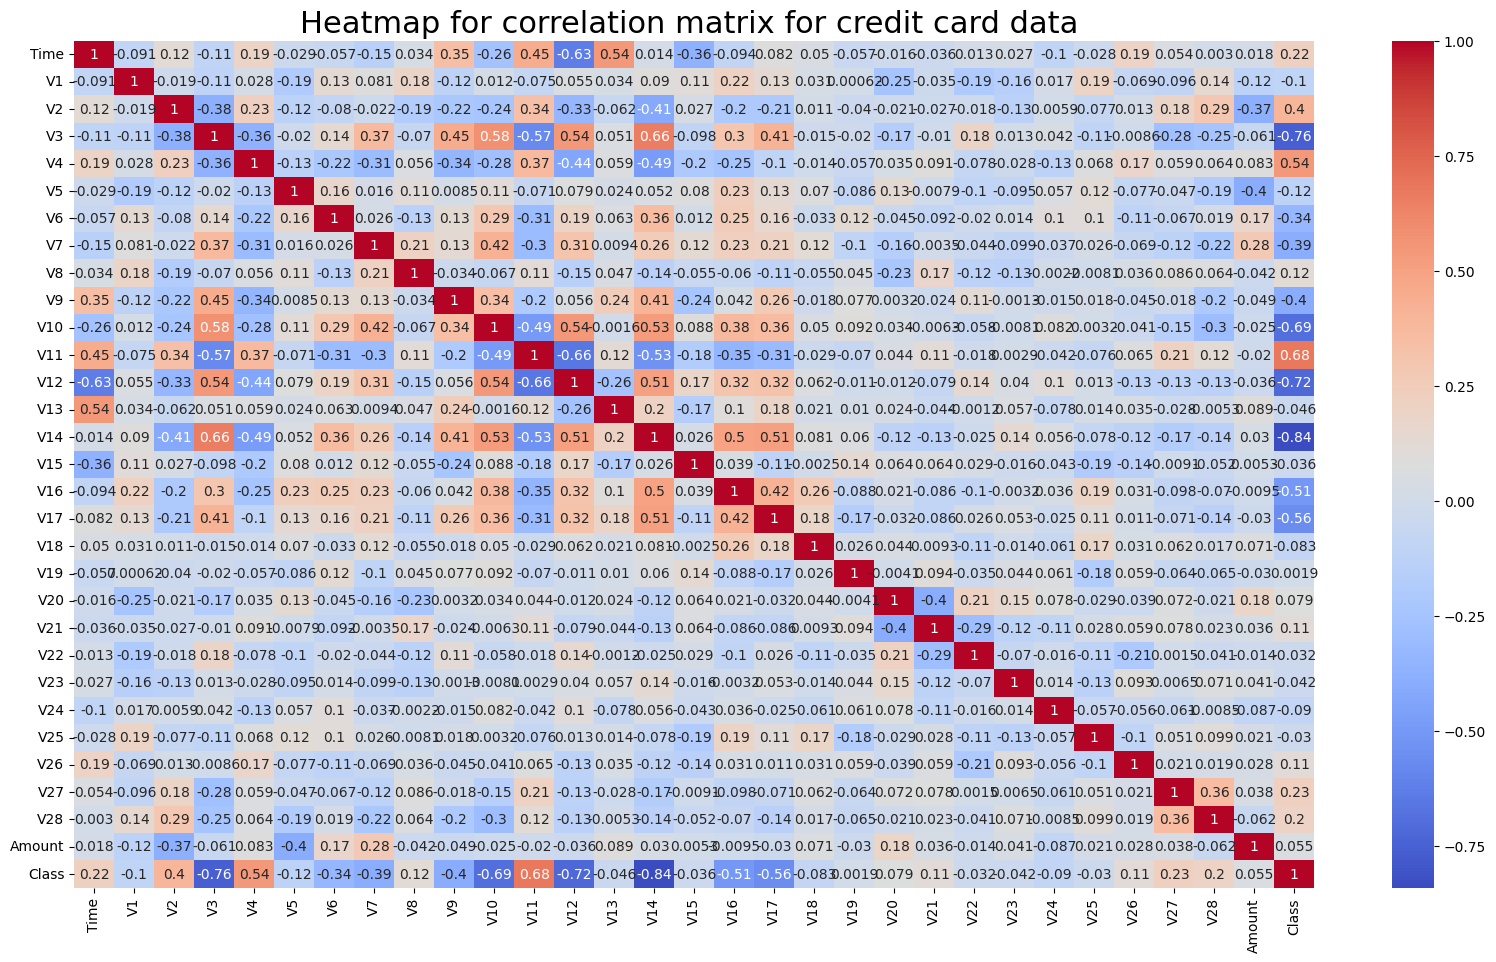

In [23]:
plt.figure(figsize = (20,11))
# heatmap size in ration 16:9

sns.heatmap(new_transaction_dataset2.corr(), annot = True, cmap = 'coolwarm')
# heatmap parameters

plt.title("Heatmap for correlation matrix for credit card data ", fontsize = 22)
plt.show()

<Axes: ylabel='count'>

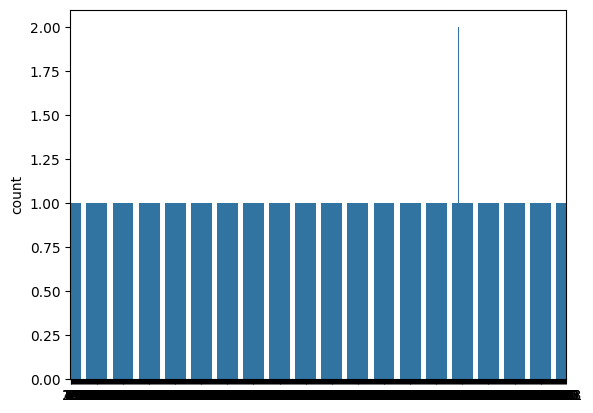

In [24]:
sns.countplot(new_transaction_dataset2.Class)

Splitting the data into features and Targets


In [25]:

X = new_transaction_dataset2.drop(columns = 'Class', axis = 1)
Y = new_transaction_dataset2['Class']
X


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
1514,1179,0.657389,-0.643789,0.947302,1.257065,-1.068192,-0.234603,-0.134554,0.024979,0.045412,...,0.426167,0.250563,0.190877,-0.189465,0.545284,0.208661,-0.497745,0.011424,0.074978,251.35
894,674,1.317181,-0.041192,0.031846,-0.374863,-0.181220,-0.370040,-0.157920,-0.025507,0.080691,...,-0.048828,-0.116005,-0.354254,-0.065098,-0.442750,0.314053,0.995430,-0.089712,-0.015727,0.92
7251,9597,-1.367604,1.660338,0.913803,0.847301,0.259609,1.668865,-0.507756,1.167468,0.281774,...,-0.017025,-0.159817,-0.149244,0.148072,-1.113154,-0.704838,0.365926,-0.294723,-0.198586,8.96
6427,7610,0.725646,2.300894,-5.329976,4.007683,-1.730411,-1.732193,-3.968593,1.063728,-0.486097,...,0.504646,0.589669,0.109541,0.601045,-0.364700,-1.843078,0.351909,0.594550,0.099372,1.00
6752,8486,-1.667389,-0.121980,1.942609,-0.149046,1.787022,-0.432432,-0.215075,0.348402,0.496906,...,0.130703,-0.184991,-0.723443,0.098882,-0.410090,0.065654,0.013938,-0.048421,0.071853,6.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6870,8757,-1.863756,3.442644,-4.468260,2.805336,-2.118412,-2.332285,-4.261237,1.701682,-1.439396,...,0.360924,0.667927,-0.516242,-0.012218,0.070614,0.058504,0.304883,0.418012,0.208858,1.00
6882,8808,-4.617217,1.695694,-3.114372,4.328199,-1.873257,-0.989908,-4.577265,0.472216,0.472017,...,-0.039046,0.481830,0.146023,0.117039,-0.217565,-0.138776,-0.424453,-1.002041,0.890780,1.10
6899,8878,-2.661802,5.856393,-7.653616,6.379742,-0.060712,-3.131550,-3.103570,1.778492,-3.831154,...,0.399097,0.734775,-0.435901,-0.384766,-0.286016,1.007934,0.413196,0.280284,0.303937,1.00
6903,8886,-2.535852,5.793644,-7.618463,6.395830,-0.065210,-3.136372,-3.104557,1.823233,-3.878658,...,0.408704,0.716720,-0.448060,-0.402407,-0.288835,1.011752,0.425965,0.413140,0.308205,1.00


In [26]:
Y

1514    0.0
894     0.0
7251    0.0
6427    1.0
6752    0.0
       ... 
6870    1.0
6882    1.0
6899    1.0
6903    1.0
6971    1.0
Name: Class, Length: 517, dtype: float64

Splitting the data into training and testing data

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify = Y, random_state = 2)


In [28]:

print("Shape of X_train ", X_train.shape)
print("Shape of X_test ", X_test.shape)
print("Shape of Y_train ", Y_train.shape)
print("Shape of Y_test ", Y_test.shape)

Shape of X_train  (413, 30)
Shape of X_test  (104, 30)
Shape of Y_train  (413,)
Shape of Y_test  (104,)



Model Training

In [29]:
model = LogisticRegression()
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation
Accuracy Score

In [30]:
# accuracy on training data

X_train_prediction = model.predict(X_train)
traning_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [31]:
print("Accuracy on Training data ",traning_data_accuracy)

Accuracy on Training data  0.9975786924939467


# accuracy on testing data


In [32]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [33]:
print("Accuracy on Training data ",test_data_accuracy)

Accuracy on Training data  1.0
